# Assignment 1. Greedy Heuristics
- Nikita Makarevich 153989
- Wojciech Mączka 148106

Source code - [](https://github.com/AmevinLS/evo-compute)
Results checked with solution checker - **YES**

## Problem Description [TODO]


## Pseudocode of algorithms

### 1. **Random** [TODO]

### 2. **Nearest-neighbor at end of current path** [TODO]

### 3. **Nearest-neighbor at any place in current path** [TODO]

### 4. **Greedy Cycle**
```plaintext
FUNCTION get_cost_diff(tsp, cycle, new_node, position):
    pre_node = node before position in cycle
    post_node = node after position in cycle
    RETURN new_node_weight + cost(pre_node, new_node) + cost(new_node, post_node) - cost(pre_node, post_node)
END FUNCTION

FUNCTION run_greedy_cycle(tsp, starting_node):
    remaining_nodes = all nodes in tsp
    cycle = empty list
    best_cost = undefined

    // Step 1: Select 3 initial nodes optimally
    FOR each pair of nodes (i, j) in remaining_nodes:
        IF valid(i, j, starting_node):
            candidate_cost = total_weight([starting_node, i, j]) + total_edge_cost([starting_node, i, j])
            IF candidate_cost < best_cost OR best_cost is undefined:
                cycle = [starting_node, i, j]
                best_cost = candidate_cost
            ENDIF
        ENDIF
    END FOR
    REMOVE nodes in cycle from remaining_nodes

    // Step 2: Greedily insert remaining nodes
    WHILE cycle is incomplete:
        selected_node, best_pos, min_diff = undefined
        FOR each node in remaining_nodes:
            FOR each possible position in cycle:
                diff = get_cost_diff(tsp, cycle, node, position)
                IF diff < min_diff OR selected_node is undefined:
                    selected_node = node
                    best_pos = position
                    min_diff = diff
                ENDIF
            END FOR
        END FOR
        INSERT selected_node at best_pos in cycle
        UPDATE total cost with min_diff
        REMOVE selected_node from remaining_nodes
    END WHILE

    RETURN {total cost, cycle}
END FUNCTION
```

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [143]:
def read_results(csv_path: str | Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df["solution"] = (
        df["solution"].str.strip("[]").str.split(",").apply(lambda l: list(map(int, l)))
    )
    return df


def read_instance(csv_path: str | Path) -> pd.DataFrame:
    data = pd.read_csv(csv_path, sep=";", header=None)
    data.columns = ["x", "y", "value"]
    return data


def visualize_solution(tsp: pd.DataFrame, sol: list[int], ax: plt.Axes | None = None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    sns.scatterplot(
        tsp,
        x="x",
        y="y",
        hue="value",
        size="value",
        ax=ax,
        palette="crest",
        legend=False,
        zorder=2,
    )
    edges_x = tsp.iloc[sol]["x"].to_list()
    edges_y = tsp.iloc[sol]["y"].to_list()

    for idx, x, y in zip(sol, edges_x, edges_y):
        ax.annotate(str(idx), (x + 0.5, y + 0.5))
    edges_x.append(edges_x[0]), edges_y.append(edges_y[0])
    ax.plot(edges_x, edges_y, c="red", zorder=1)
    return ax


tsp_to_df = {
    "tspa": read_instance("../data/TSPA.csv"),
    "tspb": read_instance("../data/TSPB.csv"),
}
algo_names = ["greedycycle"]

dfs = []
for tsp_name in tsp_to_df:
    for algo_name in algo_names:
        data = read_results(f"./{tsp_name}_{algo_name}.csv")
        data["tsp_name"] = tsp_name
        data["algo_name"] = algo_name
        dfs.append(data)
results_df = pd.concat(dfs, axis=0)
results_df = results_df.set_index(["tsp_name", "algo_name"])

## Results of computational experiments

In [129]:
results_df["cost"].groupby(["tsp_name", "algo_name"]).describe()[["mean", "min", "max"]]

,,mean,min,max
tsp_name,algo_name,,,
tspa,greedycycle,72633.94,71488.0,74410.0
tspb,greedycycle,51386.01,49001.0,57262.0


## Best Result Visualizations

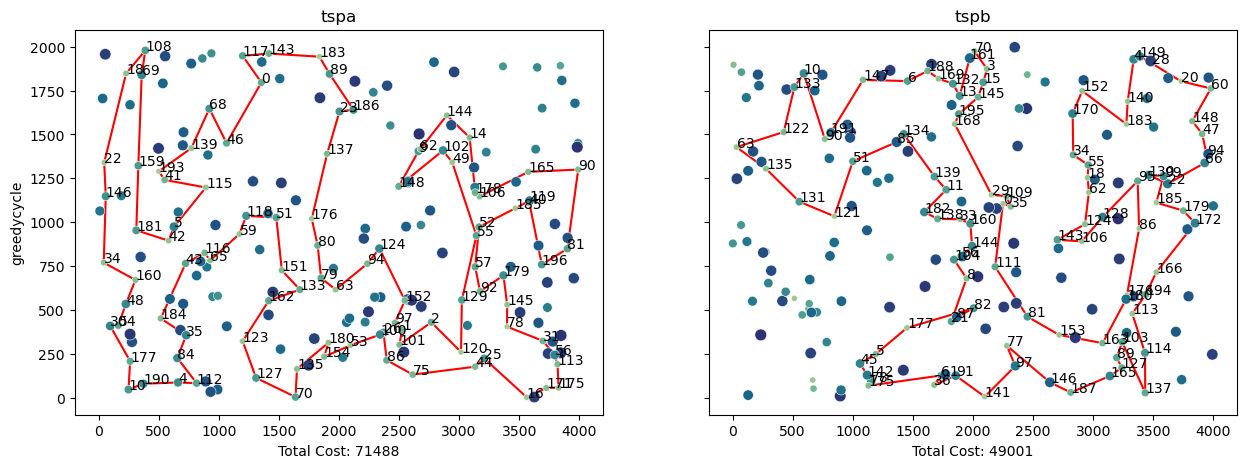

In [138]:
fig, axs = plt.subplots(
    len(algo_names),
    len(tsp_to_df),
    figsize=(15, 5 * len(algo_names)),
    sharex=True,
    sharey=True,
)
axs = axs.reshape((len(algo_names), len(tsp_to_df)))

for i, tsp_name in enumerate(tsp_to_df.keys()):
    for j, algo_name in enumerate(algo_names):
        candidates_df = results_df.loc[(tsp_name, algo_name)]
        best_idx = np.argmin(candidates_df["cost"])

        ax = axs[j, i]
        visualize_solution(
            tsp_to_df[tsp_name], candidates_df.iloc[best_idx]["solution"], ax=ax
        )
        if j == 0:
            ax.set_title(tsp_name)
        if i == 0:
            ax.set_ylabel(algo_name)
        ax.set_xlabel(f"Total Cost: {candidates_df.iloc[best_idx]['cost']}")

## Best solutions

In [142]:
for i, tsp_name in enumerate(tsp_to_df.keys()):
    for j, algo_name in enumerate(algo_names):
        candidates_df = results_df.loc[(tsp_name, algo_name)]
        best_idx = np.argmin(candidates_df["cost"])
        print(
            f"{tsp_name} | {algo_name}: {candidates_df.iloc[best_idx]['solution']}",
            end="\n\n",
        )

tspa | greedycycle: [0, 117, 143, 183, 89, 186, 23, 137, 176, 80, 79, 63, 94, 124, 152, 97, 1, 101, 2, 120, 129, 55, 49, 102, 148, 9, 62, 144, 14, 178, 106, 165, 90, 81, 196, 40, 119, 185, 52, 57, 92, 179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 75, 86, 26, 100, 53, 154, 180, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 30, 54, 48, 160, 34, 146, 22, 18, 108, 69, 159, 181, 42, 5, 115, 41, 193, 139, 68, 46]

tspb | greedycycle: [85, 134, 139, 11, 182, 138, 33, 160, 144, 56, 104, 8, 21, 87, 82, 177, 5, 45, 142, 78, 175, 61, 36, 91, 141, 97, 77, 146, 187, 165, 127, 89, 103, 137, 114, 113, 194, 166, 172, 179, 185, 99, 130, 22, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 143, 106, 128, 95, 86, 176, 180, 163, 153, 81, 111, 0, 35, 109, 29, 168, 195, 145, 15, 3, 70, 161, 13, 132, 169, 188, 6, 147, 191, 90, 10, 133, 122, 63, 135, 131, 121, 51]



## Conclusions [TODO]